In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [3]:
#reaching counties area data and forming the dataframe
path_area = "https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/counties_area.csv"
df = pd.read_csv(path_area).dropna().reset_index()
df.drop('index',axis=1,inplace=True)
df.columns= ['County','State','Land Area(sq mi,2011)']

In [4]:
#reaching counties population data and forming the dataframe
path_popul = "https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main//us_counties_residential_population.csv"
population = pd.read_csv(path_popul).dropna().reset_index()
population.drop('index',axis=1,inplace=True)

In [5]:
# Concating the population data to main data frame
df['Resident Population(2010)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==population.iloc[i,0]:
        df.iloc[i,-1] =population.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [7]:
# Generating density column
df['Density(sq mi / People )']=round(df['Resident Population(2010)']/df['Land Area(sq mi,2011)'],2)

In [8]:
# Concating the population change data to main data frame
df['Population Change(%,2000-2010)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==population.iloc[i,0]:
        df.iloc[i,-1] =population.iloc[i,3]
    else:
        df.iloc[i,-1] = np.nan

In [9]:
#reaching counties crime data and forming the dataframe
path_crime = "https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/counties_crime_reported_police.csv"
crime = pd.read_csv(path_crime).dropna().reset_index()
crime.drop('index',axis=1,inplace=True)

In [10]:
# Concating the crime data to main data frame
df['Crime Report to Police(2008)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==crime.iloc[i,0]:
        df.iloc[i,-1] =crime.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [11]:
# Generating per capita crime report column
df['Per Capita Crime Report'] = round(df['Crime Report to Police(2008)']/df['Resident Population(2010)'],4)

In [12]:
#reaching counties university student enrollment data and forming the dataframe
path_university_enrollment = "https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/counties_undergraduate_graduate_enrollment.csv"
university_enrollment = pd.read_csv(path_university_enrollment).dropna().reset_index()
university_enrollment.drop('index',inplace=True,axis=1)

In [13]:
# striping space on the data
university_enrollment.iloc[:,2] = university_enrollment.iloc[:,2].apply(lambda x: int(x.strip().replace(',','').replace('-','0')) )
university_enrollment.iloc[:,3] = university_enrollment.iloc[:,3].apply(lambda x: int(x.strip().replace(',','').replace('-','0')) )

In [14]:
# Concating the university student enrolment data to main data frame
df['University Student Enrollment'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==university_enrollment.iloc[i,0]:
        df.iloc[i,-1] =int(university_enrollment.iloc[i,2])+int(university_enrollment.iloc[i,3])
    else:
        df.iloc[i,-1] = np.nan

In [15]:
#generating per capita university student enrollment
df['University Student Concentration(%)'] = round(df['University Student Enrollment']/df['Resident Population(2010)']*100,2)

In [16]:
# reaching the building permit data
path_building_permit = "https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/us_counties_building_permit.csv"
building_permit = pd.read_csv(path_building_permit).reset_index()
building_permit.drop(['index','Unnamed: 2'],axis=1,inplace=True)
building_permit.dropna(inplace=True)

In [17]:
# Concating the building permit data to main data frame
df['Building Permit(2010)'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==building_permit.iloc[i,0]:
        df.iloc[i,-1] =building_permit.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [18]:
# generating per capita building permit data
df['Per Capita Building Permit(2010)'] = round(df['Building Permit(2010)']/df['Resident Population(2010)'],4)

In [19]:
# reaching the median age data 
path_median_age = "https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/us_counties_median_age.csv"
median_age = pd.read_csv(path_median_age).dropna().reset_index()
median_age.drop('index',axis=1,inplace=True)

In [20]:
# Concating the median age data to main data frame
df['Median Age(2010)'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==median_age.iloc[i,0]:
        df.iloc[i,-1] =median_age.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [21]:
# reaching the per capita income data data 
path_per_capita_income = "https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/us_counties_per_capita_income.csv"
per_capita_income = pd.read_csv(path_per_capita_income).dropna().reset_index()
per_capita_income.drop('index',axis=1,inplace=True)

In [22]:
#concating the per capita income data to main data frame
df['Per Capita Income(2009)'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==per_capita_income.iloc[i,0]:
        df.iloc[i,-1] = per_capita_income.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [23]:
# reaching the race data
path_race = "https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/us_counties_race.csv"
race = pd.read_csv(path_race).dropna().reset_index()
race.drop('index',axis=1,inplace=True)

In [24]:
# concating the race data to main data frame
df['White Population Consentration(2009,(%))'] = 0
df['Black Population Consentration(2009,(%))'] = 0
df['Asian Population Consentration(2009,(%))'] = 0
for i in np.arange(len(df)):
    if df.iloc[i,0]==race.iloc[i,0]:
        df.iloc[i,-3] = race.iloc[i,2]
    else:
        df.iloc[i,-3] = np.nan

for i in np.arange(len(df)):
    if df.iloc[i,0]==race.iloc[i,0]:
        df.iloc[i,-2] = race.iloc[i,3]
    else:
        df.iloc[i,-2] = np.nan
        
        
for i in np.arange(len(df)):
    if df.iloc[i,0]==race.iloc[i,0]:
        df.iloc[i,-1] = race.iloc[i,4]
    else:
        df.iloc[i,-1] = np.nan

In [25]:
# generating other race data column
df['Other Race Population Consentration(2009,(%))'] = round(100-(df.iloc[:,-1]+df.iloc[:,-2]+df.iloc[:,-3]),2)
df['Non_White Population Consentration(2009,(%))'] = 100 - df['White Population Consentration(2009,(%))']

In [26]:
#reaching vacant occupied data
path_vacant_occupied_home= "https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/us_counties_vacant_occupied_medianroom.csv"
vacant_occupied_home = pd.read_csv(path_vacant_occupied_home).reset_index()
vacant_occupied_home.drop(['index','Unnamed: 5','Unnamed: 6'],axis=1,inplace=True)
vacant_occupied_home.dropna(inplace=True)

In [27]:
# concating occopied and vacant house data to main data frame
df['Median Room Number of the Houses(2009)'] =0
for i in np.arange(len(df)):
    if df.iloc[i,0]==vacant_occupied_home.iloc[i,0]:
        df.iloc[i,-1] = vacant_occupied_home.iloc[i,3]
    else:
        df.iloc[i,-1] = np.nan
        
df['Vacant Housing Units(2010)'] =0
for i in np.arange(len(df)):
    if df.iloc[i,0]==vacant_occupied_home.iloc[i,0]:
        df.iloc[i,-1] = vacant_occupied_home.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan
        
df['Occupied Housing Units(2010)'] =0
for i in np.arange(len(df)):
    if df.iloc[i,0]==vacant_occupied_home.iloc[i,0]:
        df.iloc[i,-1] = vacant_occupied_home.iloc[i,4]
    else:
        df.iloc[i,-1] = np.nan

In [28]:
# stripping the spaces on the data
df['Vacant Housing Units(2010)']=df['Vacant Housing Units(2010)'].apply(lambda x: int(x))
df['Occupied Housing Units(2010)'] = df['Occupied Housing Units(2010)'].apply(lambda x: int(x))

In [29]:
# generating per capita vacant and occupied housing data
df['Vacant Housing Rate(%,2010)'] = round(df['Vacant Housing Units(2010)']/(df['Vacant Housing Units(2010)']+df['Occupied Housing Units(2010)'] )*100,2)
df['Per Capita Vacant Housing(2010)'] = round(df['Vacant Housing Units(2010)']/df['Resident Population(2010)'],4)

In [30]:
# reaching unemployment data
path_unemployment = "https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/us_counties_unemployment.csv"
unemployment = pd.read_csv(path_unemployment).dropna().reset_index()
unemployment.drop('index',axis=1,inplace=True)

In [31]:
# concating unemployment data to the main data frame
df['Unemployment Rate(2010,(%))'] =0
for i in np.arange(len(df)):
    if df.iloc[i,0]==unemployment.iloc[i,0]:
        df.iloc[i,-1] = unemployment.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [32]:
#reaching average house hold data
path_average_household_size ="https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/average_household_size.csv"
average_household_size = pd.read_csv(path_average_household_size).dropna().reset_index()
average_household_size.drop('index',axis=1,inplace=True)

In [33]:
# concating average house hold data to main data frame
df['Average Household Size']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==average_household_size.iloc[i,0]:
        df.iloc[i,-1] =average_household_size.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [34]:
# reaching renter_occupied_data
path_renter_occupied_housing_units = "https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/renter_occupied_housing_units.csv"
renter_occupied_housing_units = pd.read_csv(path_renter_occupied_housing_units).dropna().reset_index()
renter_occupied_housing_units.drop('index',axis=1,inplace=True)

In [35]:
# concating renter occpied data to the main data frame
df['Renter Occupied Housing Units(2010)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==renter_occupied_housing_units.iloc[i,0]:
        df.iloc[i,-1] =renter_occupied_housing_units.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [36]:
#generating renter occupied housing data
df['Renter Occpied Housing Rate(2010)'] = round(df['Renter Occupied Housing Units(2010)']/df['Occupied Housing Units(2010)']*100,2)

In [37]:
#reaching median gross cash paying rent
path_median_rent = "https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/median_gross_paying_cash_rent.csv"
median_rent = pd.read_csv(path_median_rent).dropna().reset_index()
median_rent.drop('index',axis=1,inplace=True)

In [38]:
#concating median gross paying data to the main data frame
df['Median Cash Paid Rent(2005-2009)']=0
for i in np.arange(len(df)):
    if df.iloc[i,0]==median_rent.iloc[i,0]:
        df.iloc[i,-1] =median_rent.iloc[i,2]
    else:
        df.iloc[i,-1] = np.nan

In [39]:
# Checking total data (some data have 3 missing observations)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   County                                         3145 non-null   object 
 1   State                                          3145 non-null   object 
 2   Land Area(sq mi,2011)                          3145 non-null   float64
 3   Resident Population(2010)                      3145 non-null   int64  
 4   Population Change(%,2000-2010)                 3145 non-null   int64  
 5   Density(sq mi / People )                       3145 non-null   float64
 6   Crime Report to Police(2008)                   3145 non-null   int64  
 7   Per Capita Crime Report                        3142 non-null   float64
 8   University Student Enrollment                  3145 non-null   int64  
 9   University Student Concentration(%)            3142 

In [40]:
# Checking nan values
df.isna().any()
# the columns that have missing values
df.columns[df.isna().any()]

Index(['Per Capita Crime Report', 'University Student Concentration(%)',
       'Per Capita Building Permit(2010)', 'Vacant Housing Rate(%,2010)',
       'Per Capita Vacant Housing(2010)', 'Renter Occpied Housing Rate(2010)'],
      dtype='object')

In [41]:
# Total misisng values on the data
df.dropna(inplace=True)
df.isna().sum()

County                                           0
State                                            0
Land Area(sq mi,2011)                            0
Resident Population(2010)                        0
Population Change(%,2000-2010)                   0
Density(sq mi / People )                         0
Crime Report to Police(2008)                     0
Per Capita Crime Report                          0
University Student Enrollment                    0
University Student Concentration(%)              0
Building Permit(2010)                            0
Per Capita Building Permit(2010)                 0
Median Age(2010)                                 0
Per Capita Income(2009)                          0
White Population Consentration(2009,(%))         0
Black Population Consentration(2009,(%))         0
Asian Population Consentration(2009,(%))         0
Other Race Population Consentration(2009,(%))    0
Non_White Population Consentration(2009,(%))     0
Median Room Number of the House

In [42]:
# descriptive statistic of the data
for i in df.columns:
    print(df[i].describe())

count           3142
unique          1833
top       Washington
freq              31
Name: County, dtype: object
count     3142
unique      50
top         TX
freq       254
Name: State, dtype: object
count      3142.000000
mean       1124.075735
std        3611.943252
min           2.000000
25%         430.832500
50%         616.005000
75%         923.992500
max      145504.790000
Name: Land Area(sq mi,2011), dtype: float64
count    3.142000e+03
mean     9.807251e+04
std      3.128220e+05
min      8.200000e+01
25%      1.110025e+04
50%      2.584900e+04
75%      6.652800e+04
max      9.818605e+06
Name: Resident Population(2010), dtype: float64
count    3142.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Population Change(%,2000-2010), dtype: float64
count    3142.000000
mean        4.398472
std        16.922115
min       -32.000000
25%        -5.900000
50%         1.400000
75%         9.800000
max       163.000000


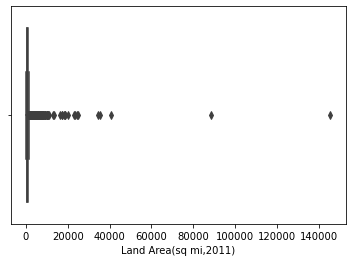

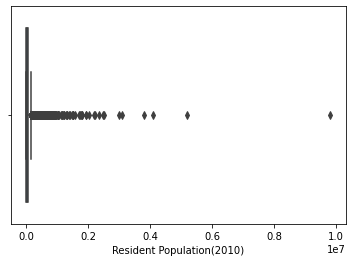

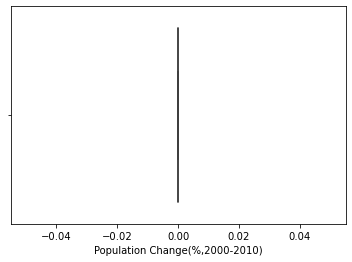

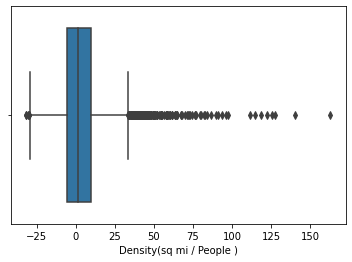

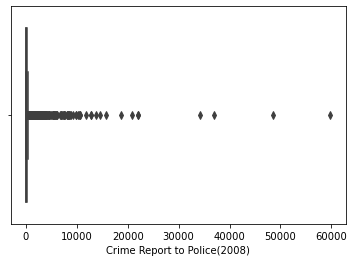

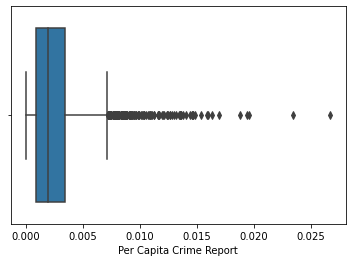

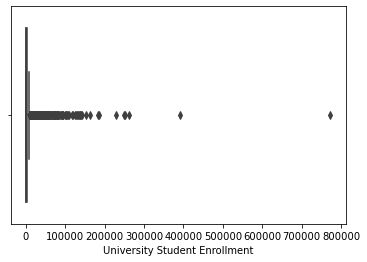

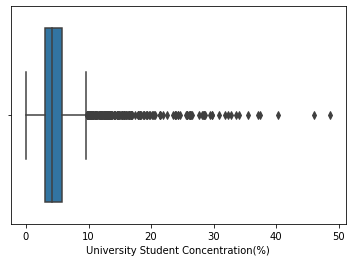

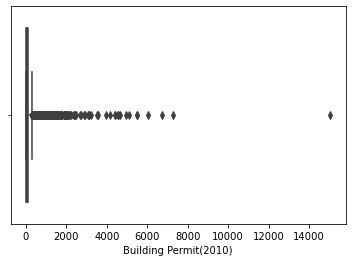

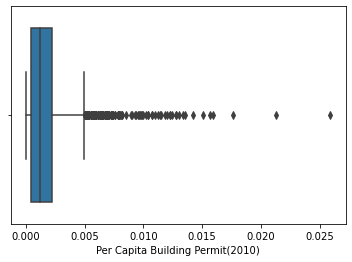

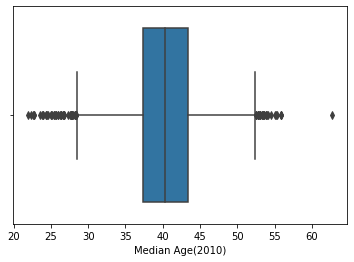

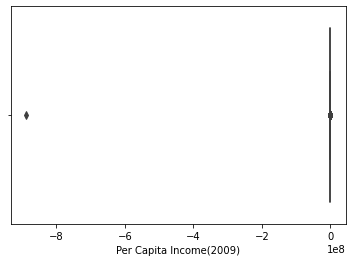

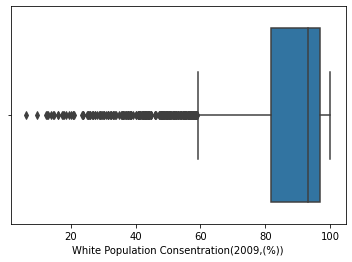

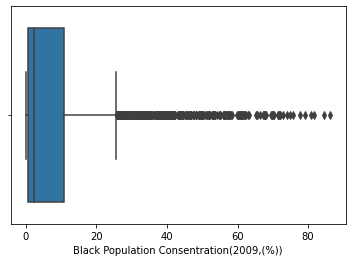

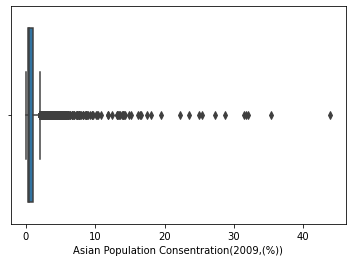

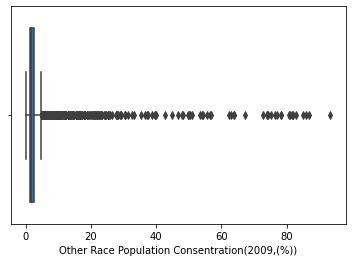

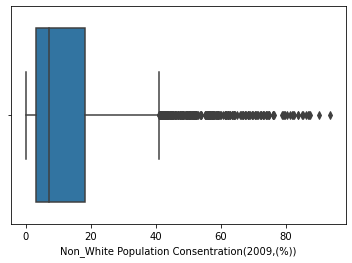

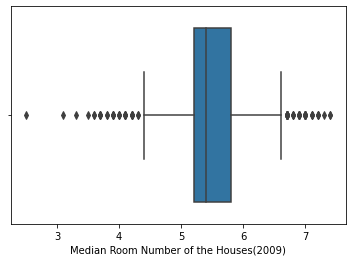

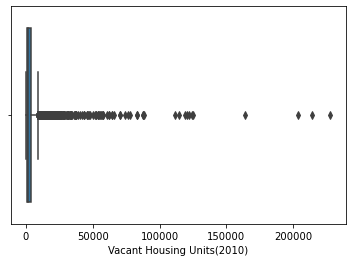

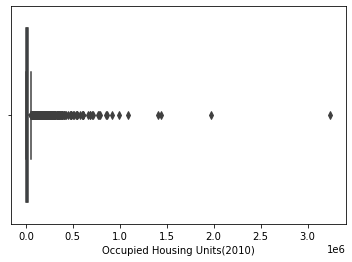

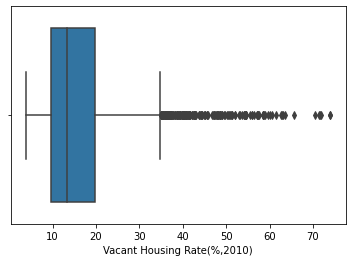

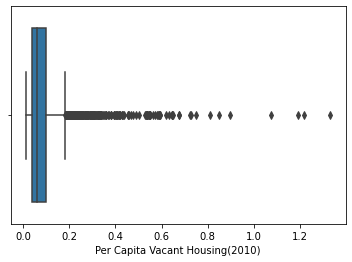

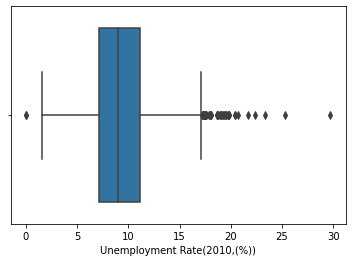

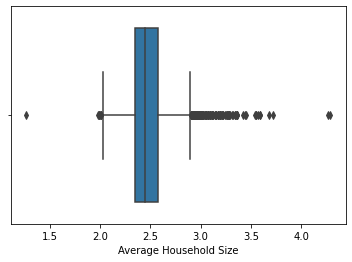

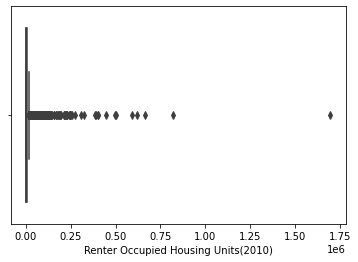

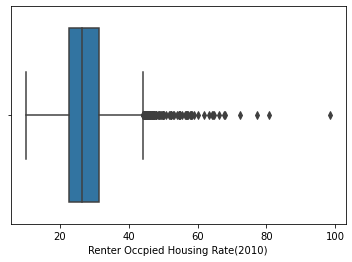

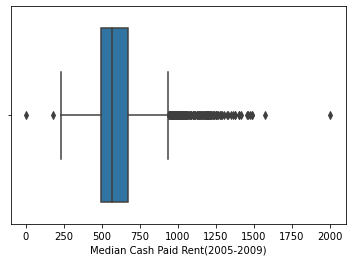

In [43]:
import seaborn as sns
# visualizing descriptive data
for i in df.describe().columns:
    sns.boxplot(x=df[i])
    plt.show()

In [127]:
#striping spaces on county and state columns
df['County'] = df['County'].apply(lambda x: x.strip())
df['State'] = df['State'].apply(lambda x: x.strip())

In [129]:
# the determining function to concate data
def data_frame(path,bedroom_number):
    data = pd.read_csv(path)# Loading the data
    data = data.iloc[:,:29]
    global df_rent
    df_rent = pd.DataFrame(columns=data.columns[0:6])
    dates = data.columns[6:]
    for i in np.arange(len(data)):
        for j in np.arange(6,len(dates)+6):
            a = list(data.iloc[i,0:6])
            a.append(data.iloc[0,j])
            a.append(data.columns[j])
            a = np.array(a).reshape(1,8)
            d=pd.DataFrame(a,columns=['Unnamed: 0','RegionName','State','Metro','CountyName','SizeRank','Price','Date'])
            df_rent=df_rent.append(d)
            
    df_rent.drop('Unnamed: 0',axis=1,inplace=True)
    df_rent.reset_index(drop=True,inplace=True)
    df_rent.replace('nan',np.nan,inplace=True)
    nans = len(df_rent[df_rent['Price'].isna()])/len(df_rent)
    print('The nan values size is {0:.02%} in the total data.'.format(nans))
    df_rent.dropna(inplace=True)
    df_rent.isna().any()
    df_rent.info()
    df_rent.reset_index(drop=True,inplace=True)
    df_rent['SizeRank'] = df_rent['SizeRank'].apply(lambda x: int(x))
    df_rent['Price'] = df_rent['Price'].apply(lambda x: float(x))
    df_rent['Date'] = df_rent['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m'))
    df_rent['Bedroom']=bedroom_number
    return df_rent
    

In [44]:
# median rent data paths
paths = ["https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/City_MedianRentalPrice_Studio.csv",'https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/City_MedianRentalPrice_1Bedroom.csv',"https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/City_MedianRentalPrice_2Bedroom.csv",
         "https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/City_MedianRentalPrice_3Bedroom.csv","https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/City_MedianRentalPrice_4Bedroom.csv",
         "https://raw.githubusercontent.com/mbenturk77/us_counties_rent_prediction_zillow_census_data/main/City_MedianRentalPrice_5BedroomOrMore.csv"]

In [45]:
#the dataframe for median rent data
df_c = pd.DataFrame(columns=['RegionName','State','Metro','CountyName','SizeRank','Price','Date','Bedroom'])

In [ ]:
#concating median rent datas
for i in np.arange(len(paths)):
    data_frame(paths[i],i)
    df_c=df_c.append(df_rent)

In [ ]:
df_cc = df_c.copy()

In [60]:
df_c

,RegionName,State,Metro,CountyName,SizeRank,Price,Date,Bedroom
0,New York,NY,New York-Newark-Jersey City,Queens County,1,1972.5,2010-02-01,0
1,New York,NY,New York-Newark-Jersey City,Queens County,1,2300.0,2010-03-01,0
2,New York,NY,New York-Newark-Jersey City,Queens County,1,2495.0,2010-04-01,0
3,New York,NY,New York-Newark-Jersey City,Queens County,1,2200.0,2010-05-01,0
4,New York,NY,New York-Newark-Jersey City,Queens County,1,2300.0,2010-06-01,0
...,...,...,...,...,...,...,...,...
1867,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,48,4250.0,2019-08-01,5
1868,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,48,4500.0,2019-09-01,5
1869,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,48,4495.0,2019-10-01,5
1870,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,48,4500.0,2019-11-01,5


In [131]:
#stripping spaces on the columns
df_c['CountyName']=df_c['CountyName'].apply(lambda x: x.replace('County',('')).strip())
df_c['CountyName']=df_c['CountyName'].apply(lambda x: x.replace('City',('')).strip())

In [133]:
# The countt names doesn't match 
list = []
for i in df_c['CountyName']:
    if df.County.isin([i]).any():
        i=i
    else:
        list.append(i)

   
  
list = pd.DataFrame(list)
list=list[0].unique()
list

array(['District of Columbia', 'Orleans Parish', 'Saint Louis',
       'Calcasieu Parish', 'Saint Johns', 'Saint Clair',
       'Matanuska Susitna Borough', 'East Baton Rouge Parish',
       'Anchorage Borough', 'Caddo Parish', 'Saint Lucie', 'Dekalb',
       'Prince Georges', 'Saint Charles', 'Bossier Parish',
       'Saint Tammany Parish', 'Jefferson Parish', 'Ouachita Parish',
       'James', 'Fairbanks North Star Borough', 'Lafourche Parish',
       'Saint Joseph', 'Saint Marys', 'Lincoln Parish',
       'Lafayette Parish', 'Livingston Parish'], dtype=object)

In [134]:
# Correcting county names 
df_c['CountyName'][df_c['CountyName']=='James'] =df_c['CountyName'][df_c['CountyName']=='James'].apply(lambda x: 'James City' )
df_c['CountyName'][df_c['CountyName']=='Saint Louis'] =df_c['CountyName'][df_c['CountyName']=='Saint Louis'].apply(lambda x: 'St. Louis' )
df_c['CountyName'][df_c['CountyName']=='Saint Johns'] =df_c['CountyName'][df_c['CountyName']=='Saint Johns'].apply(lambda x: 'St. Johns' )
df_c['CountyName'][df_c['CountyName']=='Saint Clair'] =df_c['CountyName'][df_c['CountyName']=='Saint Clair'].apply(lambda x: 'St. Clair' )
df_c['CountyName'][df_c['CountyName']=='Saint Clair'] =df_c['CountyName'][df_c['CountyName']=='Saint Clair'].apply(lambda x: 'St. Clair' )
df_c['CountyName'][df_c['CountyName']=='Matanuska Susitna'] =df_c['CountyName'][df_c['CountyName']=='Matanuska Susitna'].apply(lambda x: 'Matanuska-Susitna' )
df_c['CountyName'][df_c['CountyName']=='Saint Lucie'] =df_c['CountyName'][df_c['CountyName']=='Saint Lucie'].apply(lambda x: 'St. Lucie' )
df_c['CountyName'][df_c['CountyName']=='Dekalb'] =df_c['CountyName'][df_c['CountyName']=='Dekalb'].apply(lambda x: 'DeKalb' )
df_c['CountyName'][df_c['CountyName']=='Prince Georges'] =df_c['CountyName'][df_c['CountyName']=='Prince Georges'].apply(lambda x: "Prince George's" )
df_c['CountyName'][df_c['CountyName']=='Saint Charles'] =df_c['CountyName'][df_c['CountyName']=='Saint Charles'].apply(lambda x: "St. Charles" )
df_c['CountyName'][df_c['CountyName']=='Saint Tammany'] =df_c['CountyName'][df_c['CountyName']=='Saint Tammany'].apply(lambda x: "St. Tammany" )
df_c['CountyName'][df_c['CountyName']=='Saint Joseph'] =df_c['CountyName'][df_c['CountyName']=='Saint Joseph'].apply(lambda x: "St. Joseph" )
df_c['CountyName'][df_c['CountyName']=='Saint Marys'] =df_c['CountyName'][df_c['CountyName']=='Saint Marys'].apply(lambda x: "St. Mary's" )
df_c['CountyName'][df_c['CountyName']=='District of Columbia'] =df_c['CountyName'][df_c['CountyName']=='District of Columbia'].apply(lambda x: "Columbia" )
df_c['State'][df_c['State']=='DC']=df_c['State'][df_c['State']=='DC'].apply(lambda x: 'WA')

In [149]:
# correcting the index
df_c.reset_index(drop=True, inplace=True)

In [150]:
#correcting formats
df_c['Bedroom'] = df_c['Bedroom'].apply(lambda x: int(x))
df_c['Year']= df_c['Date'].apply(lambda x: x.year)

In [152]:
df_c

,RegionName,State,Metro,CountyName,SizeRank,Price,Date,Bedroom,Year
0,New York,NY,New York-Newark-Jersey City,Queens,1,1972.5,2010-02-01,0,2010
1,New York,NY,New York-Newark-Jersey City,Queens,1,2300.0,2010-03-01,0,2010
2,New York,NY,New York-Newark-Jersey City,Queens,1,2495.0,2010-04-01,0,2010
3,New York,NY,New York-Newark-Jersey City,Queens,1,2200.0,2010-05-01,0,2010
4,New York,NY,New York-Newark-Jersey City,Queens,1,2300.0,2010-06-01,0,2010
...,...,...,...,...,...,...,...,...,...
355525,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,48,4250.0,2019-08-01,5,2019
355526,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,48,4500.0,2019-09-01,5,2019
355527,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,48,4495.0,2019-10-01,5,2019
355528,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,48,4500.0,2019-11-01,5,2019


In [153]:
#preparing bedroom based mean rent for counties
aa = df_c[(df_c['Year']==2010)|(df_c['Year']==2011)].groupby(['CountyName','Bedroom','State']).mean()
aa.reset_index(inplace=True)
aa.drop('Year',axis=1,inplace=True)
aa.columns = ['County','Bedroom','State','Rent']

In [216]:
aa 

,County,Bedroom,State,Rent
0,Ada,1,ID,2379.900000
1,Ada,2,ID,2765.611111
2,Adams,1,CO,2379.900000
3,Adams,2,CO,2765.611111
4,Alachua,1,FL,2379.900000
...,...,...,...,...
984,York,1,SC,2379.900000
985,York,2,PA,2765.611111
986,York,2,SC,2765.611111
987,York,2,VA,2765.611111


In [160]:
df

,County,State,"Land Area(sq mi,2011)",Resident Population(2010),Density(sq mi / People ),"Population Change(%,2000-2010)",Crime Report to Police(2008),Per Capita Crime Report,University Student Enrollment,University Student Concentration(%),...,Median Room Number of the Houses(2009),Vacant Housing Units(2010),Occupied Housing Units(2010),"Vacant Housing Rate(%,2010)",Per Capita Vacant Housing(2010),"Unemployment Rate(2010,(%))",Average Household Size,Renter Occupied Housing Units(2010),Renter Occpied Housing Rate(2010),Median Cash Paid Rent(2005-2009)
0,Autauga,AL,594.44,54571,91.80,6.1,116,0.0021,2442,4.47,...,5.9,1914,20221,8.65,0.0351,8.0,2.68,4973,24.59,779
1,Baldwin,AL,1589.78,182265,114.65,25.1,306,0.0017,7084,3.89,...,5.4,30881,73180,29.68,0.1694,8.9,2.46,20109,27.48,788
2,Barbour,AL,884.88,27457,31.03,2.7,31,0.0011,928,3.38,...,5.4,2009,9820,16.98,0.0732,12.1,2.47,3264,33.24,499
3,Bibb,AL,622.58,22915,36.81,5.4,44,0.0019,589,2.57,...,5.4,1028,7953,11.45,0.0449,10.7,2.60,1942,24.42,506
4,Blount,AL,644.78,57322,88.90,7.6,27,0.0005,2301,4.01,...,5.5,2309,21578,9.67,0.0403,8.9,2.63,4194,19.44,541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,Sweetwater,WY,10426.65,43806,4.20,-7.0,229,0.0052,2308,5.27,...,5.5,2260,16475,12.06,0.0516,6.7,2.62,4603,27.94,753
3141,Teton,WY,3995.38,21294,5.33,19.4,52,0.0024,332,1.56,...,4.8,3840,8973,29.97,0.1803,8.2,2.34,3890,43.35,960
3142,Uinta,WY,2081.26,21118,10.15,43.7,17,0.0008,621,2.94,...,5.7,1045,7668,11.99,0.0495,7.0,2.72,1909,24.90,522
3143,Washakie,WY,2238.55,8533,3.81,-11.7,23,0.0027,176,2.06,...,5.9,341,3492,8.90,0.0400,6.5,2.40,932,26.69,465


In [227]:
#Merging data
data = pd.merge(df,aa,on=['County','State'] )

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 973
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   County                                         974 non-null    object 
 1   State                                          974 non-null    object 
 2   Land Area(sq mi,2011)                          974 non-null    float64
 3   Resident Population(2010)                      974 non-null    int64  
 4   Density(sq mi / People )                       974 non-null    float64
 5   Population Change(%,2000-2010)                 974 non-null    float64
 6   Crime Report to Police(2008)                   974 non-null    int64  
 7   Per Capita Crime Report                        974 non-null    float64
 8   University Student Enrollment                  974 non-null    int64  
 9   University Student Concentration(%)            974 non

In [307]:
#descriptive statistis
for i in data.describe():
    print(data[i].describe().round(2))

count      974.00
mean      1011.52
std       1597.38
min          2.53
25%        421.44
50%        626.34
75%        916.09
max      20056.94
Name: Land Area(sq mi,2011), dtype: float64
count        974.00
mean      531619.17
std       800495.95
min         4078.00
25%       156545.00
50%       294567.00
75%       630380.00
max      9818605.00
Name: Resident Population(2010), dtype: float64
count      974.00
mean      1126.49
std       2139.91
min          4.69
25%        239.29
50%        481.07
75%       1236.55
max      20553.97
Name: Density(sq mi / People ), dtype: float64
count    974.00
mean      17.47
std       21.91
min      -17.10
25%        3.30
50%       11.05
75%       25.42
max      163.00
Name: Population Change(%,2000-2010), dtype: float64
count      974.00
mean      2667.24
std       5300.58
min          0.00
25%        422.00
50%       1029.00
75%       2788.50
max      59788.00
Name: Crime Report to Police(2008), dtype: float64
count    974.00
mean       0.00
std  

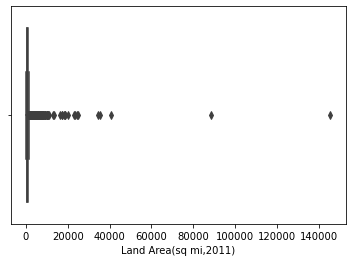

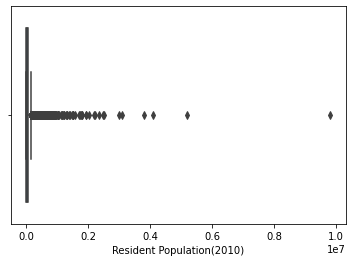

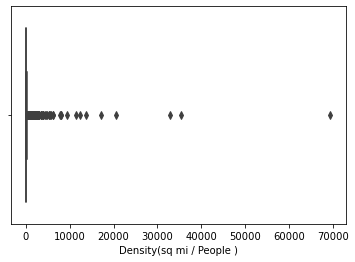

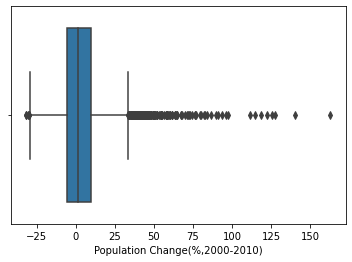

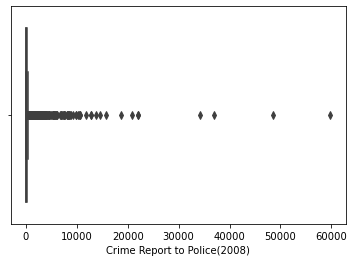

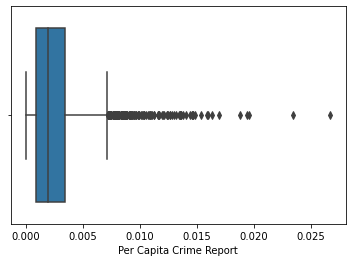

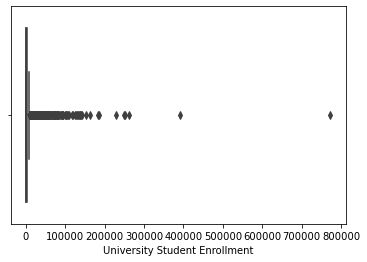

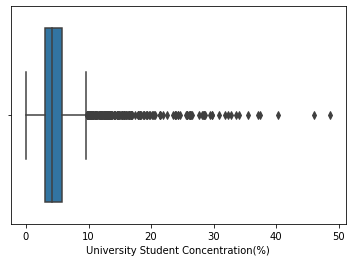

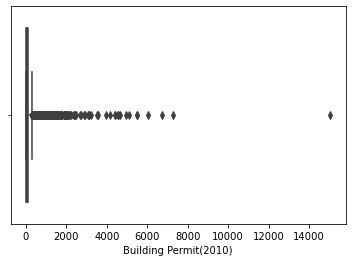

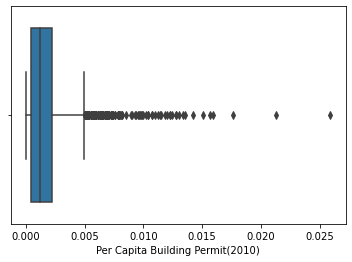

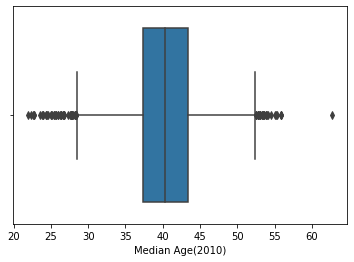

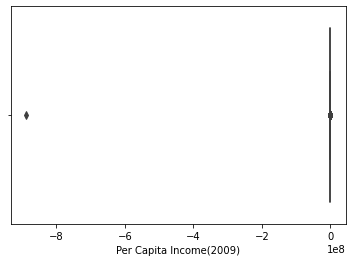

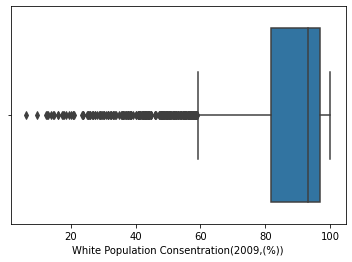

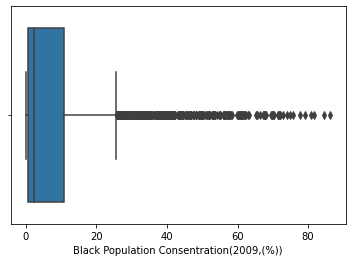

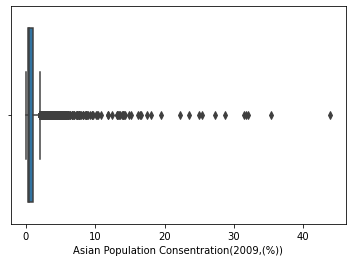

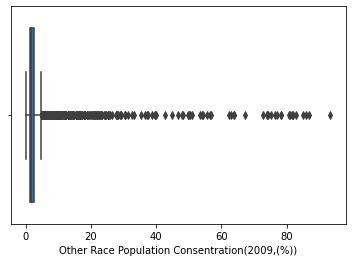

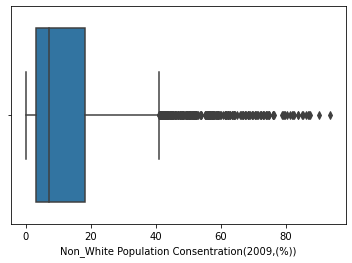

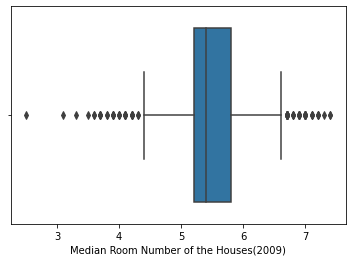

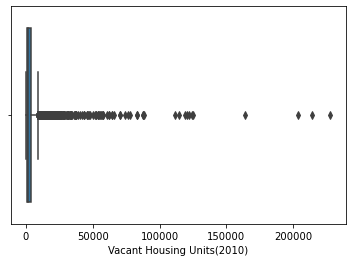

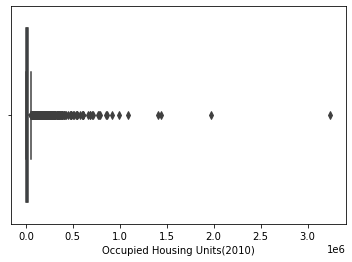

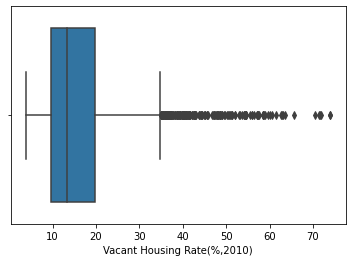

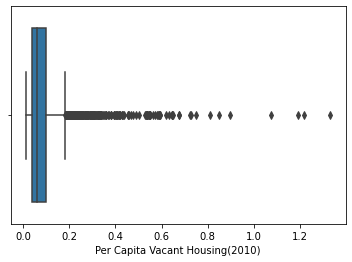

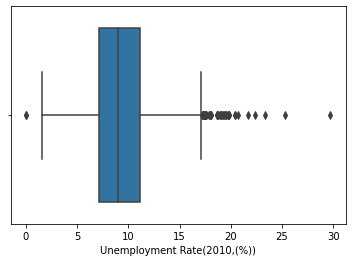

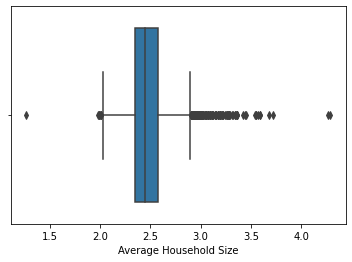

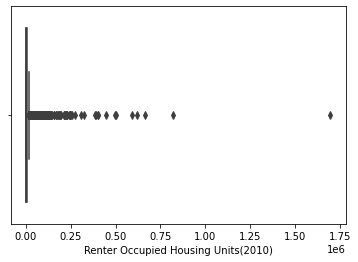

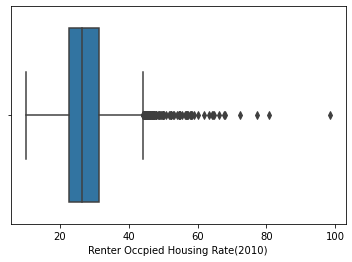

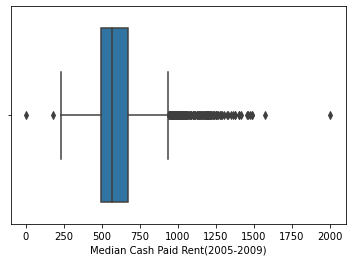

KeyError: 'Bedroom'

In [308]:
# visualizing descriptive data
for i in data.describe().columns:
    sns.boxplot(x=df[i])
    plt.show()

In [231]:
#data columns and index values
for i in enumerate(data.columns):
    print(i)

(0, 'County')
(1, 'State')
(2, 'Land Area(sq mi,2011)')
(3, 'Resident Population(2010)')
(4, 'Density(sq mi / People )')
(5, 'Population Change(%,2000-2010)')
(6, 'Crime Report to Police(2008)')
(7, 'Per Capita Crime Report')
(8, 'University Student Enrollment')
(9, 'University Student Concentration(%)')
(10, 'Building Permit(2010)')
(11, 'Per Capita Building Permit(2010)')
(12, 'Median Age(2010)')
(13, 'Per Capita Income(2009)')
(14, 'White Population Consentration(2009,(%))')
(15, 'Black Population Consentration(2009,(%))')
(16, 'Asian Population Consentration(2009,(%))')
(17, 'Other Race Population Consentration(2009,(%))')
(18, 'Non_White Population Consentration(2009,(%))')
(19, 'Median Room Number of the Houses(2009)')
(20, 'Vacant Housing Units(2010)')
(21, 'Occupied Housing Units(2010)')
(22, 'Vacant Housing Rate(%,2010)')
(23, 'Per Capita Vacant Housing(2010)')
(24, 'Unemployment Rate(2010,(%))')
(25, 'Average Household Size')
(26, 'Renter Occupied Housing Units(2010)')
(27, '

In [229]:
#determining target
y = data.iloc[:,30].round(2)

In [294]:
# determining features
x = data.iloc[:,[4,5,7,9,11,12,13,14,15,16,17,18,19,22,23,24,25,27,29]]

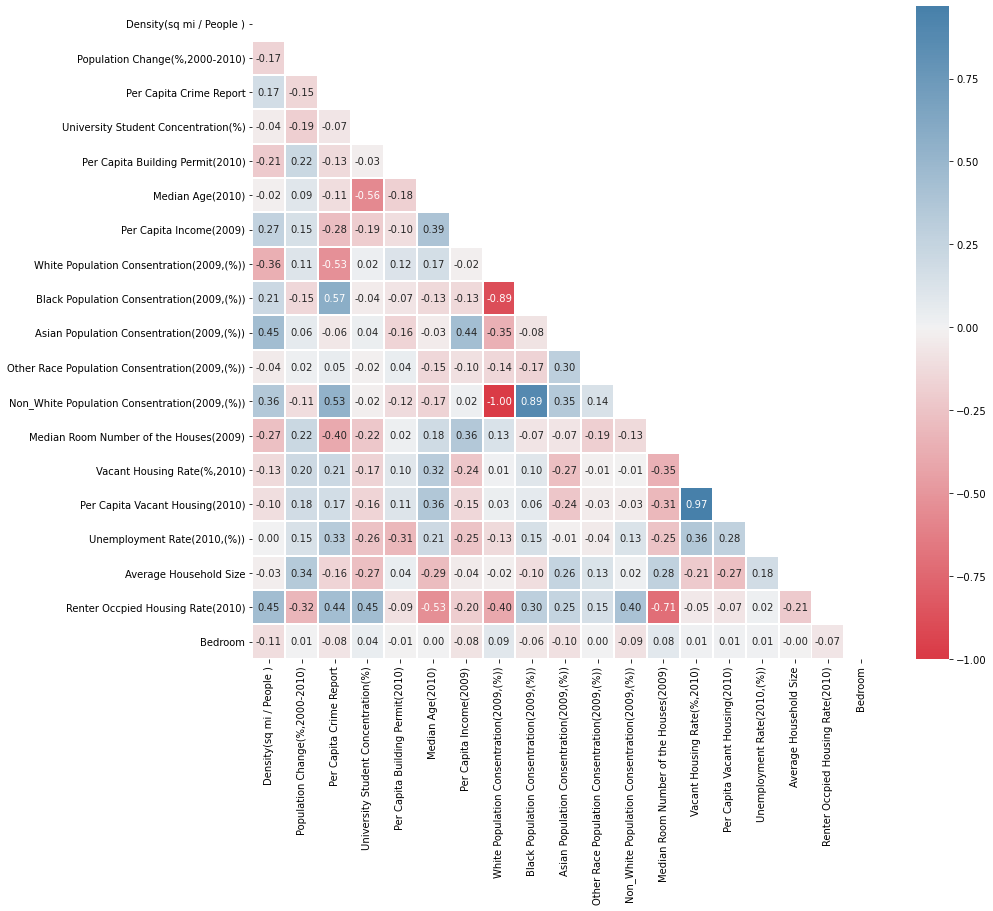

In [309]:
# Correlation Matrix and visualazing it on heat map
corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10,h_pos=240,as_cmap=True)
figure = plt.figure(figsize=(14,12))
sns.heatmap(X.corr(), mask=mask,center=0, cmap=cmap, linewidths=1,annot=True, fmt=".2f")
plt.show()

In [295]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
X = StandardScaler().fit_transform(x)

In [296]:
X = pd.DataFrame(X,columns=x.columns)

In [297]:
# PCA analysis
from sklearn.decomposition import PCA
pca = PCA(len(x.columns))
pca.fit(X)
explained_varian_ratio = pca.explained_variance_ratio_
explained_variance_ratio = pd.DataFrame(explained_varian_ratio,index=x.columns,columns=['Explained Variance Ratio']).round(2).sort_values(by='Explained Variance Ratio',ascending=False)
fig = plt.figure()
explained_variance_ratio.plot(kind='bar',figsize=(12,10))
plt.show()

<Figure size 432x288 with 0 Axes>

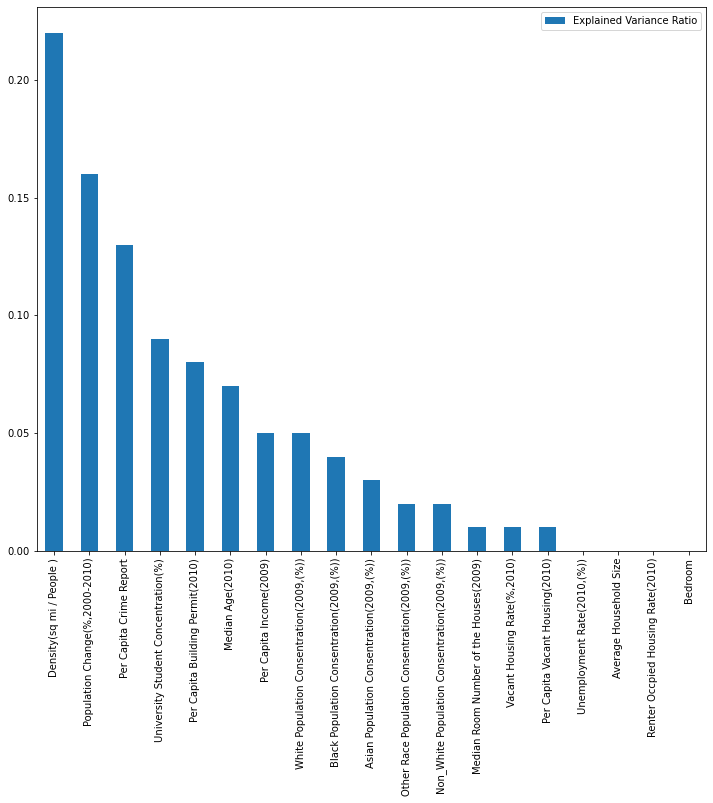

In [315]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [316]:
input_dim = x.shape[1]

In [312]:
#keras linraries
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import BatchNormalization
from sklearn.metrics import r2_score
from keras.regularizers import l2
from keras.layers import Dropout,Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam
from keras.models import Sequential

In [313]:
# the keras model structure
def make_keras_model(learning_rate=0.01,activation='relu',layer1_units=64, layer2_units=64,
                      layer3_units=64,dropout_rate=0.1, nbr_features=input_dim ,l2_regularization=0):
     
        # Describing optimization function
        opt = Adam(lr =learning_rate)  
        # Initialize the model
        model = Sequential()
        # Add input layer 
        model.add(Dense(layer1_units,input_shape=(nbr_features,),activation=activation))
        # Add Batchnormalization layer
        model.add(BatchNormalization())
        # Add first hidden layer
        model.add(Dense(layer2_units, activation = activation,kernel_regularizer=l2(l2_regularization)))
        # Add Batchnormalization layer
        model.add(BatchNormalization())
        # Add droupout layer
        model.add(Dropout(rate=dropout_rate))
        # Add Batchnormalization layer
        model.add(BatchNormalization())
        # Add second hidden layer
        model.add(Dense(layer3_units, activation = activation,kernel_regularizer=l2(l2_regularization)))
        # Add Batchnormalization layer
        model.add(BatchNormalization())
        # Add output layer
        model.add(Dense(1,activation='linear'))
    
        # Compile your model with your optimizer, loss, and metrics
        model.compile(optimizer = opt, loss = 'mse', metrics = ['mae'])
        return model

In [314]:
# keras regressor
from keras.wrappers.scikit_learn import KerasRegressor
regressor_keras = KerasRegressor(make_keras_model, 
                                 batch_size=32, 
                                 layer1_units=64,
                                 layer2_units=64,
                                 layer3_units=64,
                                 dropout_rate=0,
                                 l2_regularization=0,
                                 epochs=10, 
                                 verbose=False)

In [323]:
#pipeline
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
pipeline_keras = Pipeline([('imputer', SimpleImputer()), 
                           ('scaler', StandardScaler()), 
                           ('model', regressor_keras)])

In [324]:
#gridsearch parameters
param_grid_keras ={
    
    'scaler': [StandardScaler()],
    'model__layer1_units': [32,64],
    'model__layer2_units': [16, 32],
    'model__layer3_units': [8, 16],
    'model__dropout_rate': [0, 0.2],
    'model__epochs': [10,20,30],
    'model__learning_rate':[0.01,0.1],
    'model__activation':['relu','tanh'],
    'model__batch_size':[32,64],
    
}

In [325]:
#gridsearch 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
gridsearch_keras = GridSearchCV(pipeline_keras,
                                param_grid=param_grid_keras,
                                scoring='neg_mean_squared_error',
                                cv=2, 
                                refit=True,
                                verbose=True)

In [326]:
#gridsearch fitting
gridsearch_keras.fit(X_train, y_train)

Fitting 2 folds for each of 384 candidates, totalling 768 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 768 out of 768 | elapsed: 84.8min finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000000841CF74430>)]),
             param_grid={'model__activation': ['relu', 'tanh'],
                         'model__batch_size': [32, 64],
                         'model__dropout_rate': [0, 0.2],
                         'model__epochs': [10, 20, 30],
                         'model__layer1_units': [32, 64],
                         'model__layer2_units': [16, 32],
                         'model__layer3_units': [8, 16],
                         'model__learning_rate': [0.01, 0.1],
                         'scaler': [StandardScaler()]},
             scoring='neg_mean_squared_error', verbose=True)

In [327]:
#prediction
y_pred_keras = gridsearch_keras.predict(X_test)

In [328]:
print(f'Best params: {gridsearch_keras.best_params_}')

Best params: {'model__activation': 'relu', 'model__batch_size': 32, 'model__dropout_rate': 0.2, 'model__epochs': 30, 'model__layer1_units': 32, 'model__layer2_units': 32, 'model__layer3_units': 8, 'model__learning_rate': 0.1, 'scaler': StandardScaler()}


In [329]:
print(f'Best score: {gridsearch_keras.best_score_}')

Best score: -3749.4027465988524


In [330]:
print(f'Test MSE: {mean_squared_error(y_true=y_test, y_pred=y_pred_keras)}')

Test MSE: 522.4512268466125


In [331]:
print(f'Test MAE: {mean_absolute_error(y_true=y_test, y_pred=y_pred_keras)}')

Test MAE: 20.689510535956817


In [332]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred_keras)
print('R2: ' '{:.4f}'.format(r2_score))

R2: 0.9923


In [334]:
gridsearch_keras.best_params_['model__batch_size']

32

In [336]:
# Describing optimization function (tuned model)
opt = Adam(lr = gridsearch_keras.best_params_['model__learning_rate'])  
# Initialize the model
model_tuned = Sequential()
# Add input layer 
model_tuned.add(Dense(gridsearch_keras.best_params_['model__layer1_units'],input_shape=(input_dim,),activation=gridsearch_keras.best_params_['model__activation']))
# Add Batchnormalization layer
model_tuned.add(BatchNormalization())
# Add first hidden layer
model_tuned.add(Dense(gridsearch_keras.best_params_['model__layer2_units'],activation = gridsearch_keras.best_params_['model__activation'],kernel_regularizer=l2(0)))
# Add Batchnormalization layer
model_tuned.add(BatchNormalization())
# Add droupout layer
model_tuned.add(Dropout(rate=gridsearch_keras.best_params_['model__dropout_rate']))
# Add Batchnormalization layer
model_tuned.add(BatchNormalization())
# Add second hidden layer
model_tuned.add(Dense(gridsearch_keras.best_params_['model__layer3_units'], activation = gridsearch_keras.best_params_['model__activation'],kernel_regularizer=l2(0)))
# Add Batchnormalization layer
model_tuned.add(BatchNormalization())
# Add output layer
model_tuned.add(Dense(1,activation='linear'))
    
# Compile your model with your optimizer, loss, and metrics
model_tuned.compile(optimizer = opt, loss = 'mse', metrics = ['mae'])
        

In [337]:
model_tuned_hist = model_tuned.fit(X_train, y_train,epochs = gridsearch_keras.best_params_['model__epochs']
                                                 ,batch_size=gridsearch_keras.best_params_['model__batch_size'],
               validation_data=(X_test, y_test))

Epoch 1/30
21/21 [==============================] - 7s 45ms/step - loss: 6417726.2500 - mae: 2520.5535 - val_loss: 12044654.0000 - val_mae: 3445.7966
Epoch 2/30
21/21 [==============================] - 0s 7ms/step - loss: 6102266.1364 - mae: 2456.8869 - val_loss: 6472143.0000 - val_mae: 2513.0459
Epoch 3/30
21/21 [==============================] - 0s 8ms/step - loss: 5169408.1136 - mae: 2258.5265 - val_loss: 384146.0000 - val_mae: 529.2099
Epoch 4/30
21/21 [==============================] - 0s 8ms/step - loss: 3703824.8750 - mae: 1906.0373 - val_loss: 6786931.5000 - val_mae: 2549.6548
Epoch 5/30
21/21 [==============================] - 0s 15ms/step - loss: 2079859.8750 - mae: 1416.5694 - val_loss: 1174609.2500 - val_mae: 1049.7833
Epoch 6/30
21/21 [==============================] - 0s 7ms/step - loss: 839547.8466 - mae: 874.3762 - val_loss: 387422.5000 - val_mae: 562.7587
Epoch 7/30
21/21 [==============================] - 0s 6ms/step - loss: 249727.1804 - mae: 432.3557 - val_loss: 693

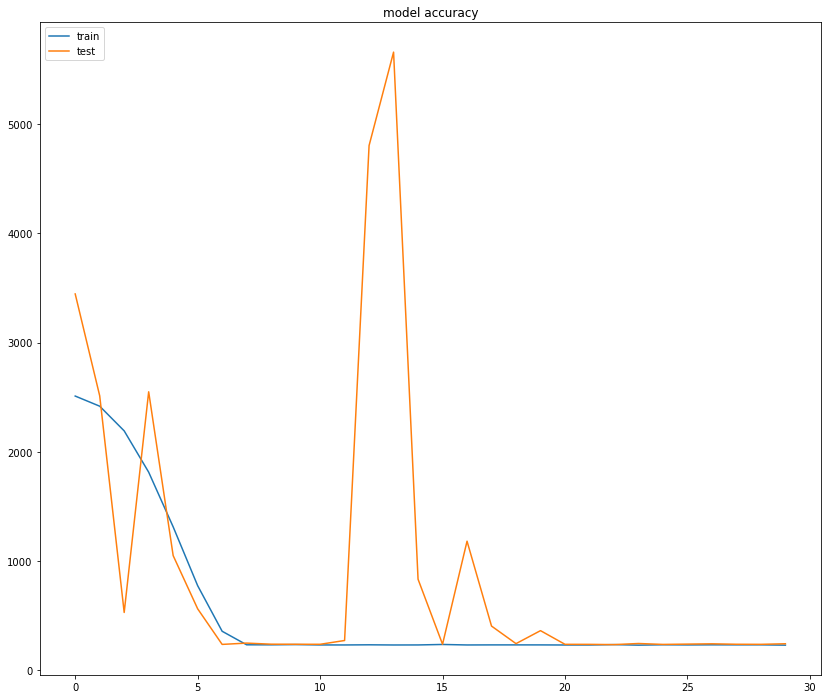

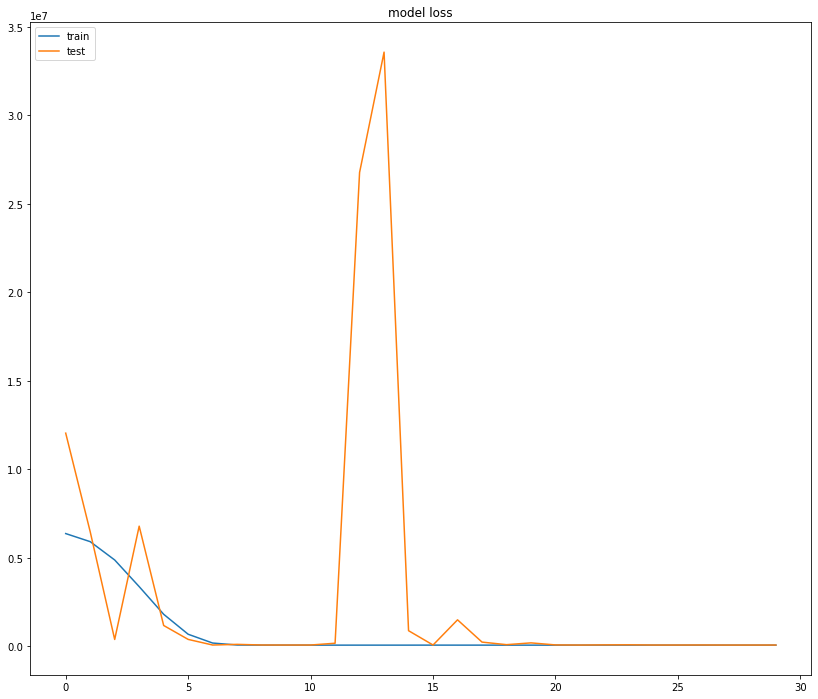

In [342]:
# summarize history for accuracy
plt.figure(figsize=(14,12))
plt.plot(model_tuned_hist.history['mae'])
plt.plot(model_tuned_hist.history['val_mae'])
plt.title('model accuracy')
plt.ylabel=('accuracy')
plt.xlabel=('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(14,12))
plt.plot(model_tuned_hist.history['loss'])
plt.plot(model_tuned_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel=('loss')
plt.xlabel=('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# spikes indicate training problem; the zillow data very limited for this term (data has just rent information for just 0,1,2 bedroom)

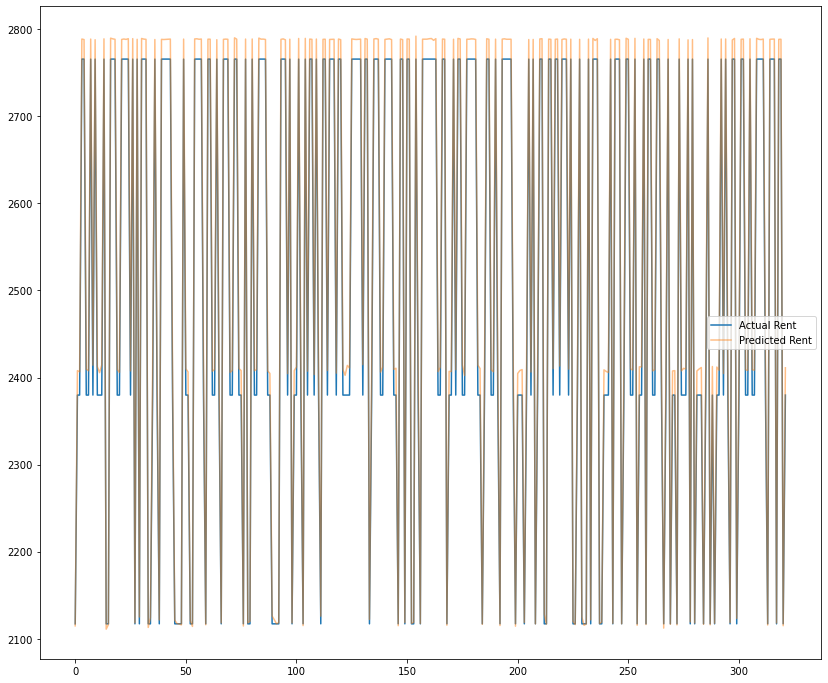

In [345]:
#predictions
actual_rent = pd.DataFrame(y_test)
actual_rent.columns=['Actual Rent']
actual_rent.reset_index(drop=True,inplace=True)
predicted_rent = pd.DataFrame(y_pred_keras)
predicted_rent.columns=['Predicted Rent']
fig = plt.figure(figsize=(14,12))
plt.plot(actual_rent,label='Actual Rent')
plt.plot(predicted_rent,label='Predicted Rent',alpha=0.5)
plt.legend(loc='best')
plt.show()